In [1]:
import csv
import os
import matplotlib.pyplot as plt
from datetime import datetime


In [3]:
# Define the file name for storing expenses
FILE_NAME = "expenses.csv"

# Check if the file exists, and if not, create it with a header row
if not os.path.exists(FILE_NAME):
    with open(FILE_NAME, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Date", "Category", "Amount", "Description"])

In [5]:
def add_expense():
    # Get user input for expense details
    category = input("Enter category (e.g., Food, Transport, Utilities): ").capitalize()
    
    # Validate the amount input
    try:
        amount = float(input("Enter amount: "))
    except ValueError:
        print("Invalid amount. Please enter a numeric value.")
        return

    description = input("Enter a brief description: ")
    date = datetime.now().strftime("%Y-%m-%d")

    # Write the expense to the CSV file
    with open(FILE_NAME, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([date, category, amount, description])

    print(f"Expense added: {category} - ${amount:.2f} ({description})")

In [7]:
def view_expenses():
    # Check if the file exists and is not empty
    if not os.path.exists(FILE_NAME) or os.stat(FILE_NAME).st_size == 0:
        print("No expenses recorded yet.")
        return

    # Read and display expenses from the file
    with open(FILE_NAME, mode='r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row
        print("\nDate         | Category      | Amount    | Description")
        print("-" * 60)
        for row in reader:
            print(f"{row[0]} | {row[1]:<13} | ${float(row[2]):<8.2f} | {row[3]}")

In [9]:
def visualize_expenses():
    # Initialize a dictionary to store expenses by category
    expenses_by_category = {}

    # Read expenses from the CSV file
    with open(FILE_NAME, mode='r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row
        for row in reader:
            category = row[1]
            amount = float(row[2])
            expenses_by_category[category] = expenses_by_category.get(category, 0) + amount

    # Check if there are any expenses to visualize
    if not expenses_by_category:
        print("No expenses to visualize.")
        return

    # Plot the data using matplotlib
    categories = list(expenses_by_category.keys())
    amounts = list(expenses_by_category.values())

    plt.figure(figsize=(10, 6))
    plt.bar(categories, amounts, color='skyblue')
    plt.title("Expenses by Category")
    plt.xlabel("Category")
    plt.ylabel("Total Amount ($)")
    plt.grid(axis='y')
    plt.show()


Expense Tracker Menu:
1. Add an Expense
2. View All Expenses
3. Visualize Expenses by Category
4. Exit


Choose an option (1-4):  1
Enter category (e.g., Food, Transport, Utilities):  Food
Enter amount:  204
Enter a brief description:  Lunch 


Expense added: Food - $204.00 (Lunch )

Expense Tracker Menu:
1. Add an Expense
2. View All Expenses
3. Visualize Expenses by Category
4. Exit


Choose an option (1-4):  2



Date         | Category      | Amount    | Description
------------------------------------------------------------
2024-12-10 | Food          | $204.00   | Lunch 

Expense Tracker Menu:
1. Add an Expense
2. View All Expenses
3. Visualize Expenses by Category
4. Exit


Choose an option (1-4):  1
Enter category (e.g., Food, Transport, Utilities):  Transport
Enter amount:  25
Enter a brief description:  go to office


Expense added: Transport - $25.00 (go to office)

Expense Tracker Menu:
1. Add an Expense
2. View All Expenses
3. Visualize Expenses by Category
4. Exit


Choose an option (1-4):  3


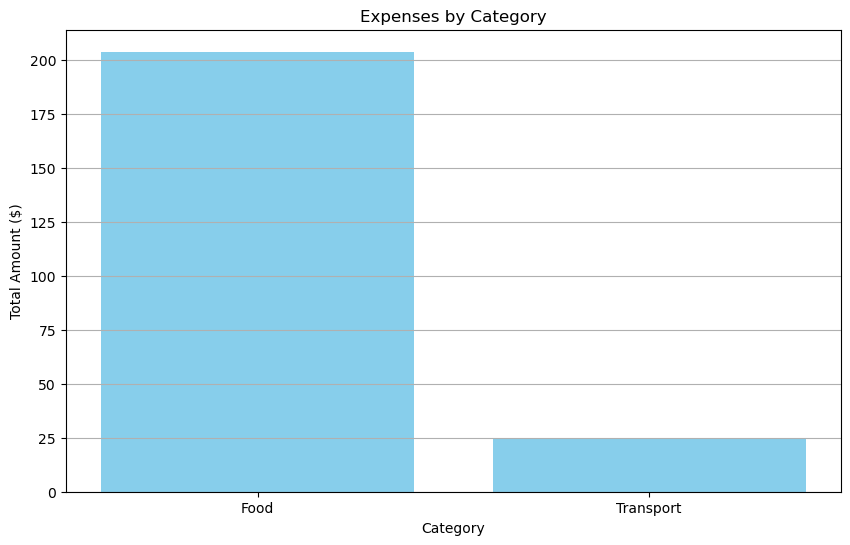


Expense Tracker Menu:
1. Add an Expense
2. View All Expenses
3. Visualize Expenses by Category
4. Exit


Choose an option (1-4):  4


Goodbye!


In [12]:
def main():
    while True:
        print("\nExpense Tracker Menu:")
        print("1. Add an Expense")
        print("2. View All Expenses")
        print("3. Visualize Expenses by Category")
        print("4. Exit")

        choice = input("Choose an option (1-4): ")

        if choice == '1':
            add_expense()
        elif choice == '2':
            view_expenses()
        elif choice == '3':
            visualize_expenses()
        elif choice == '4':
            print("Goodbye!")
            break
        else:
            print("Invalid choice. Please enter a number between 1 and 4.")

if __name__ == "__main__":
    main()